# Data Storytelling

Horse racing is a sport that has been practiced since ancient times and today is a multi-billion dollar industry. It is a dangerous sport, both for the horse and the jockey, and has only grown to be more dangerous with the increased presence of drug abuse within the practice. There are laws and regulations that have been introduced to address safety  and doping concerns within the sport, but have they made a difference over the years? Are there other variables that influence equine breakdowns and deaths or is drug abuse the root of a real problem in the industry?

Let's start by importing and inspecting the dataframe.

In [366]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import dataset as a dataframe
df = pd.read_csv('Equine_Breakdown_Death_Doping.csv',index_col = 'Unnamed: 0')
df.head()

,Year,Incident Date,Incident Type,Track,Inv Location,Racing Type Description,Division,Weather Conditions,Horse,Trainer,...,Rain,Snow,Wind,Thunder Storm,Hot,Humid,Warm,Year of Action,Action Description,Source
0,2009,2009-03-04,EQUINE DEATH,Aqueduct Racetrack (NYRA),Aqueduct,Racing,Thoroughbred,NaN,Private Details,JOHN P. TERRANOVA II,...,False,False,False,False,False,False,False,NaN,NaN,NaN
1,2009,2009-03-04,ACCIDENT - ON TRACK,Aqueduct Racetrack (NYRA),NaN,Racing,Thoroughbred,NaN,Private Details,JOHN P. TERRANOVA II,...,False,False,False,False,False,False,False,NaN,NaN,NaN
2,2009,2009-03-04,ACCIDENT - ON TRACK,Aqueduct Racetrack (NYRA),Aqueduct,Racing,Thoroughbred,NaN,All Bets Off,B E. LEVINE,...,False,False,False,False,False,False,False,NaN,NaN,NaN
3,2009,2009-03-04,ACCIDENT - ON TRACK,Aqueduct Racetrack (NYRA),Aqueduct,Racing,Thoroughbred,NaN,Hot Chile Soup,ENRIQUE ARROYO,...,False,False,False,False,False,False,False,NaN,NaN,NaN
4,2009,2009-03-04,ACCIDENT - ON TRACK,Aqueduct Racetrack (NYRA),Aqueduct,Racing,Thoroughbred,NaN,One Dream Union,BRUCE R. BROWN,...,False,False,False,False,False,False,False,NaN,NaN,NaN


In [367]:
# use info() method for a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3240 entries, 0 to 3239
Data columns (total 27 columns):
Year                       3240 non-null int64
Incident Date              3240 non-null object
Incident Type              3240 non-null object
Track                      3240 non-null object
Inv Location               3137 non-null object
Racing Type Description    3240 non-null object
Division                   3240 non-null object
Weather Conditions         2189 non-null object
Horse                      3239 non-null object
Trainer                    3185 non-null object
Jockey Driver              2090 non-null object
Incident Description       3240 non-null object
Death or Injury            2751 non-null object
Cloudy                     3240 non-null bool
Sunny                      3240 non-null bool
Clear                      3240 non-null bool
Overcast                   3240 non-null bool
Rain                       3240 non-null bool
Snow                       3240 non-null

In [368]:
# display the shape of the dataframe
df.shape

(3240, 27)

Our data frame contains 3,240 entries in 27 columns.

# Trends Over Time

The Equine Death and Breakdown dataset was first published in February 2013 but the oldest records in the set are from March 2009. The most recent version of the dataset contains information through November 2017. Although we haven't reached the end of 2017 yet, we can assume that we're close enough to the end of the year that there most likely won't be too much of an increase in the number of horses that will breakdown and/or die. For the past nine years of data, let's see if we can identify any trends across some of our descriptive variables.

First, let's look at whether the number of deaths and breakdowns has decreased over the years.

In [369]:
# build dataframe of each year and total count of breakdowns and deaths for that year
year_total = df.groupby('Year')['Year'].count().reset_index(name='Total')
print(year_total)

# print mean of yearly totals for reference (rate: deaths and breakdowns per year)
print('Average: ', year_total['Total'].mean())

   Year  Total
0  2009    339
1  2010    442
2  2011    426
3  2012    483
4  2013    418
5  2014    373
6  2015    295
7  2016    251
8  2017    213
Average:  360.0


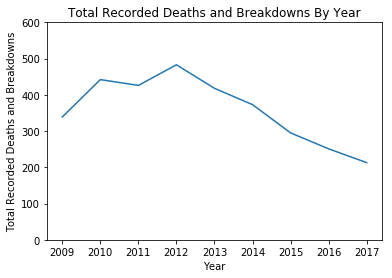

In [370]:
# build line plot displaying total number of deaths and breakdowns by year
plt.plot(year_total['Year'],year_total['Total'])
plt.xlabel('Year')
plt.ylabel('Total Recorded Deaths and Breakdowns')
plt.title('Total Recorded Deaths and Breakdowns By Year')
plt.yticks([0,100,200,300,400,500,600])
plt.show()

Fortunately, it looks like the total breakdown and death rate has decreased over the years. The death and breakdown rate peaked in 2012 with a total of 483 deaths and breakdowns but has steadily been decreasing. The average of our totals is 360, and the rate has stayed lower than that average since 2015.

Let's look at trends of some of the descriptive variables over time. Although the overall death and breakdown rate has decreased over the years, are there certain variables that still heavily influence the breakdown and death rate? 

# Trends Over Time - Racing Type

Let's first study how many horses died or broke down each year for each racing type. Is racing type a significant factor in whether a horse breaksdown or dies while on a track?

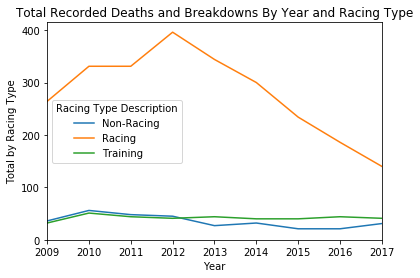

In [371]:
# create pivot table of how many of each racing type occurred each year
racingtype_pivot = df.pivot_table(values='Incident Date', index='Year', columns='Racing Type Description', aggfunc='count')

# drop the 'Unknown' column since it contains little data
del racingtype_pivot['Unknown']

# plot the above pivot table
racingtype_pivot.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Total by Racing Type')
plt.title('Total Recorded Deaths and Breakdowns By Year and Racing Type')
plt.yticks([0,100,200,300,400])
plt.show()

We can see that the majority of our incidents occurred while racing. The number of training and non-racing incidents remains mostly constant over the years, but there's a very steady drop in the number of racing incidents from 2012 onwards. Is this due to increases in regulations for racing?

We should also recognize that training or non-racing incidents are probably artificially low. Racing incidents are easy to keep track of since races are watched by audiences. Training and non-racing incidents might just be self reported by owners and trainers, which could be why the totals are so low. This means that there actually could be more of a problem here than we can see from our data.

# Trends Over Time - Incident Type

Next, we'll look at how many deaths and breakdowns occurred each year for each incident type. Are there certain incident types that are more common?

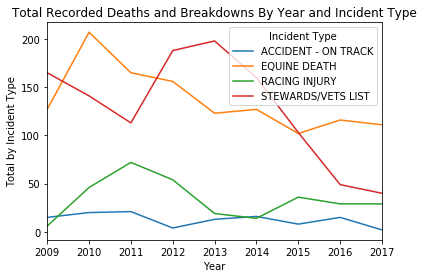

In [372]:
# create pivot table of how many of each incident type occurred each year
incidenttype_pivot = df.pivot_table(values='Incident Date', index='Year', columns='Incident Type', aggfunc='count')

# remove some less populated columns for more clarity in our graph and discussion
del incidenttype_pivot['ACCIDENT - DRIVER/JOCKEY']
del incidenttype_pivot['ACCIDENT - IN STARTING GATE']
del incidenttype_pivot['ACCIDENT - TAGGED SULKY']
del incidenttype_pivot['DRIVER/JOCKEY INJURED']
del incidenttype_pivot['EQUINE DEATH - INFECTIOUS DISEASE']
del incidenttype_pivot['FALL OF HORSE']
del incidenttype_pivot['FALL OF RIDER']

# plot the above pivot table
incidenttype_pivot.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Total by Incident Type')
plt.title('Total Recorded Deaths and Breakdowns By Year and Incident Type')
plt.show()

In the above graph, we've displayed four of the more common incident types. We can see that accidents on the track have stayed relatively constant over the years, but there are some insights to be gained from the other three curves.

The Stewards list contains the names of horses that are ineligible race because of poor or inconsistent performance. They haven't been seriously injured, but are in bad enough shape that they've been deemed unraceable. In the above graph, we can see that the 'EQUINE DEATH' and 'STEWARDS/VETS LIST' curves display a bit of an inverse relationship. Equine deaths peaked in 2010, but have slowly decreased over the years. Horses being placed on the Stewards/vets list hit a low point in 2011, but increased in 2012, where it surpassed the number of equine deaths. We can also see that the number of racing injuries peaked in 2011 and has mostly decreased over the years. 

Could the number of deaths and racing injuries have gone down because more horses were being placed on the Stewards/vets list as a precaution? We know from studying the different racing types that racing incidents decreased from 2012 onwards, which correlates with the curves in the graph above. Or is there something else happening here? Fewer horses have been placed on the Stewards list in recent years but the equine death rate remains steadily high. Is simply more regulation needed? Let's see what other variables effect equine death and breakdown rates.

# Weather Conditions

Weather conditions can have a significant influence on how a race turns out. Sometimes it can be beneficial, and other times it can make or break a race. For example, if a track is too wet and muddy, it can be more difficult for horses to run at quicker speeds and they end up over exterting themselves. It's also more likely that they could get a hoove stuck in the mud and collapse.  

Let's look at which of our weather conditions are more common when it comes to racehorse breakdowns and deaths.

            index  Count
0          Cloudy    703
1           Sunny    148
2           Clear   1025
3        Overcast     43
4            Rain    120
5            Snow     23
6            Wind     23
7   Thunder Storm      2
8             Hot     38
9           Humid     23
10           Warm     52


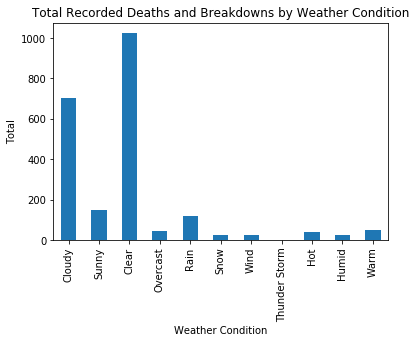

In [373]:
# create a dataframe of boolean weather columns
weather_bool = df[['Cloudy', 'Sunny', 'Clear', 'Overcast', 'Rain', 'Snow', 'Wind', 'Thunder Storm', 'Hot', 'Humid', 'Warm']]

# calculate how many of each weather condition appears in our dataset
weather_count = weather_bool.sum().reset_index(name='Count')
print(weather_count)

# plot weather_count
weather_bar = weather_count['Count'].plot(kind='bar')
weather_bar.set_xlabel('Weather Condition')
weather_bar.set_ylabel('Total')
weather_bar.set_title('Total Recorded Deaths and Breakdowns by Weather Condition')
weather_bar.set_xticklabels(weather_count['index'].tolist())
plt.show()

The most common weather condition for breakdowns and deaths is by far the 'Clear' condition with over a thousand records. 'Cloudy' was also a relatively common weather condition recorded, followed by 'Sunny' and 'Rain'. What's surprising about these results is that the top three weather conditions don't necessarily yield poor track conditions. Let's say it's a clear and sunny day. Looking at the graph above, you would think that these conditions would have a high chance of yielding a breakdown or death. But the tracks themselves should be in relatively good shape under these conditions (assuming that the previous day's weather conditions didn't poorly effect them) and shouldn't have a large effect on racing conditions. If the weather isn't explaining why horses are breaking down and dying on the track, then what is?

# Trainers and Doping

The main focus of this project is to study how doping effects equine deaths and breakdowns. We're assuming that if a trainer has a history of doping (usually fined or suspended), it's likely that they've drugged many of their horses in the past.

First, let's see how many trainers in our dataset have a history of drugging their horses and how many of their horses have had incidents.

In [374]:
# pull records of trainers with a history of doping
doping_trainers = df.loc[pd.notnull(df['Year of Action'])]

# display the number of unique trainer names in the dataset
print('Number of trainers with a history of doping: ', doping_trainers['Trainer'].nunique())

# display how many horses with incidents each trainer trained
print('Number of horses trained per trainer: ')
print(doping_trainers['Trainer'].value_counts())

Number of trainers with a history of doping:  22
Number of horses trained per trainer: 
RODOLFO (RUDY) RODRIGUEZ    50
GARY C. CONTESSA            46
WILLIAM I. MOTT             17
MIKE J. MAKER               16
STEVEN M. ASMUSSEN          15
RICHARD E. DUTROW JR        12
SEAN M. CAMPBELL             5
JAMIE J. NESS                5
ROY SEDLACEK                 4
ALAN E. GOLDBERG             3
DAWN M. DEVAUX               3
MARC (JOE) J. SHARP          2
JOSEPH R. CARRUBBA           2
ANTONIO C. AVILA             1
STEPHEN MURCHISON            1
JULIE E. MILLER              1
LUIS PENA                    1
PATRICIA FARRO               1
ROBERTINO DIODORO            1
RONALD J. BURKE              1
BOB BAFFERT                  1
MEGAN M. GILMOUR             1
Name: Trainer, dtype: int64


Some of our doping trainers have had a lot of horses that had incidents on the track, but the majority of them only have a few horses that have had an incident. Let's see how these incidents occurred over time.

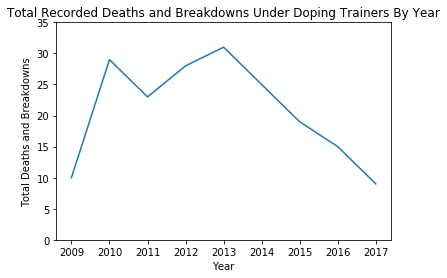

In [375]:
# calculate how many possibly effected horses had incidents each year
doped_horses_year = doping_trainers.groupby('Year')['Year'].count().reset_index(name='Count')

# plot the yearly totals of horses that broke down or died for trainers with a history of doping
plt.plot(doped_horses_year['Year'],doped_horses_year['Count'])
plt.xlabel('Year')
plt.ylabel('Total Deaths and Breakdowns')
plt.title('Total Recorded Deaths and Breakdowns Under Doping Trainers By Year')
plt.yticks([0,5,10,15,20,25,30,35])
plt.show()

According to the above graph, equine deaths and breakdowns with a likelihood of doping peaked in 2013 and have decreased since then. This is a good sign that regulations have had an impact on both identifying trainers who drug their horses and preventing other trainers from taking up the practice. But yearly totals are still above zero as plenty of trainers have been identified as guilty of doping within the past year, so there is still work to be done.

# Conclusions

Though the yearly incient totals of equine deaths and breakdowns has been decreasing, there is always room for improvement. Most of our records are of horses breaking down or dying during races, and the yearly totals of these racing incidents has decreased over the years. We saw that adding horses to the Stewards/vets list most likely helped save some horses from worse injuries and possibly death, but the rate of an incident occurring (especially death) is still quite high. We also saw that a weather condition variable can't singularly reveal whether an incident is likely.

Though the number of likely drugged horses has decreased over the years, it doesn't mean that the practice of doping is coming to an end. The mindset of cheating the system and winning more races (and money) will always be present. New drugs are always being developed and drug testing is only administered at races, so there are definitely some gaps in the above analysis for non-racing and training incidents. The above insights have given us a starting point though as we continue to perform tests and analyze our dataset to try to predict and identify who future guilty trainers might be.